# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

--2026-02-08 13:27:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip.1’

household_power_con     [  <=>               ]  19.68M  51.2MB/s    in 0.4s    

2026-02-08 13:27:56 (51.2 MB/s) - ‘household_power_consumption.zip.1’ saved [20640916]

Archive:  household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/tmp/ipython-input-43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [11]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [14]:
#convert all data columns to numeric types
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [12]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [15]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [16]:
df.Date[0]

datetime.date(2006, 12, 16)

In [17]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [18]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

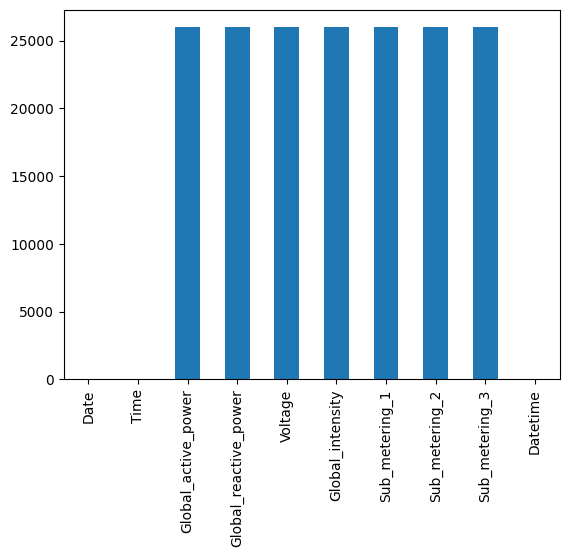

In [19]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

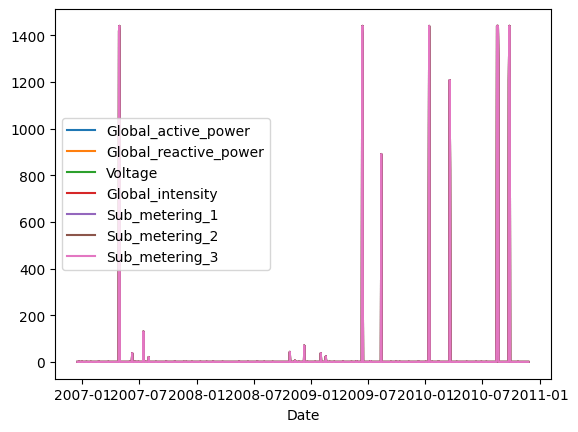

In [20]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: The data shows that when values are missing, they tend to be missing across all sensors at once, likely due to system downtime.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Interpolation

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [24]:
# Use linear interpolation to fill missing values
# Calling infer_objects first to avoid FutureWarning with object dtypes
df = df.infer_objects(copy=False)
df.interpolate(method='linear', limit_direction='both', inplace=True)

/tmp/ipython-input-203150474.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='both', inplace=True)


In [25]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0903,0.1236,240.8328,4.6215,1.1095,1.2892,6.4424,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6140,0.1000,241.0000,2.7516,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0526,0.1124,3.2378,4.4244,6.1158,5.7866,8.4159,NaN


<Axes: xlabel='Date'>

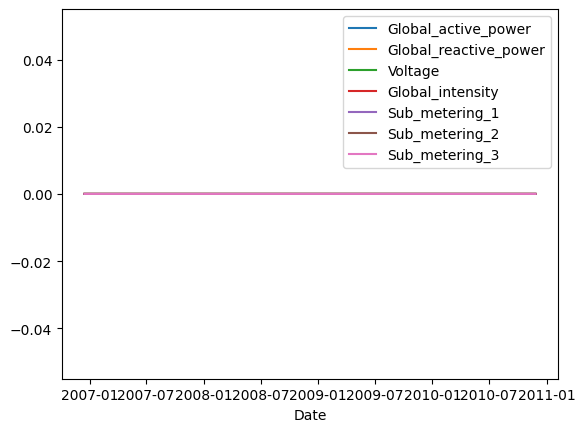

In [26]:
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I've selected four key variables: Global active power, Voltage, and two specific sub-metering categories . Comparing global power to sub-metering categories helps us understand the composition of energy usage, while voltage provides insight into the stability of the electrical supply relative to that usage.

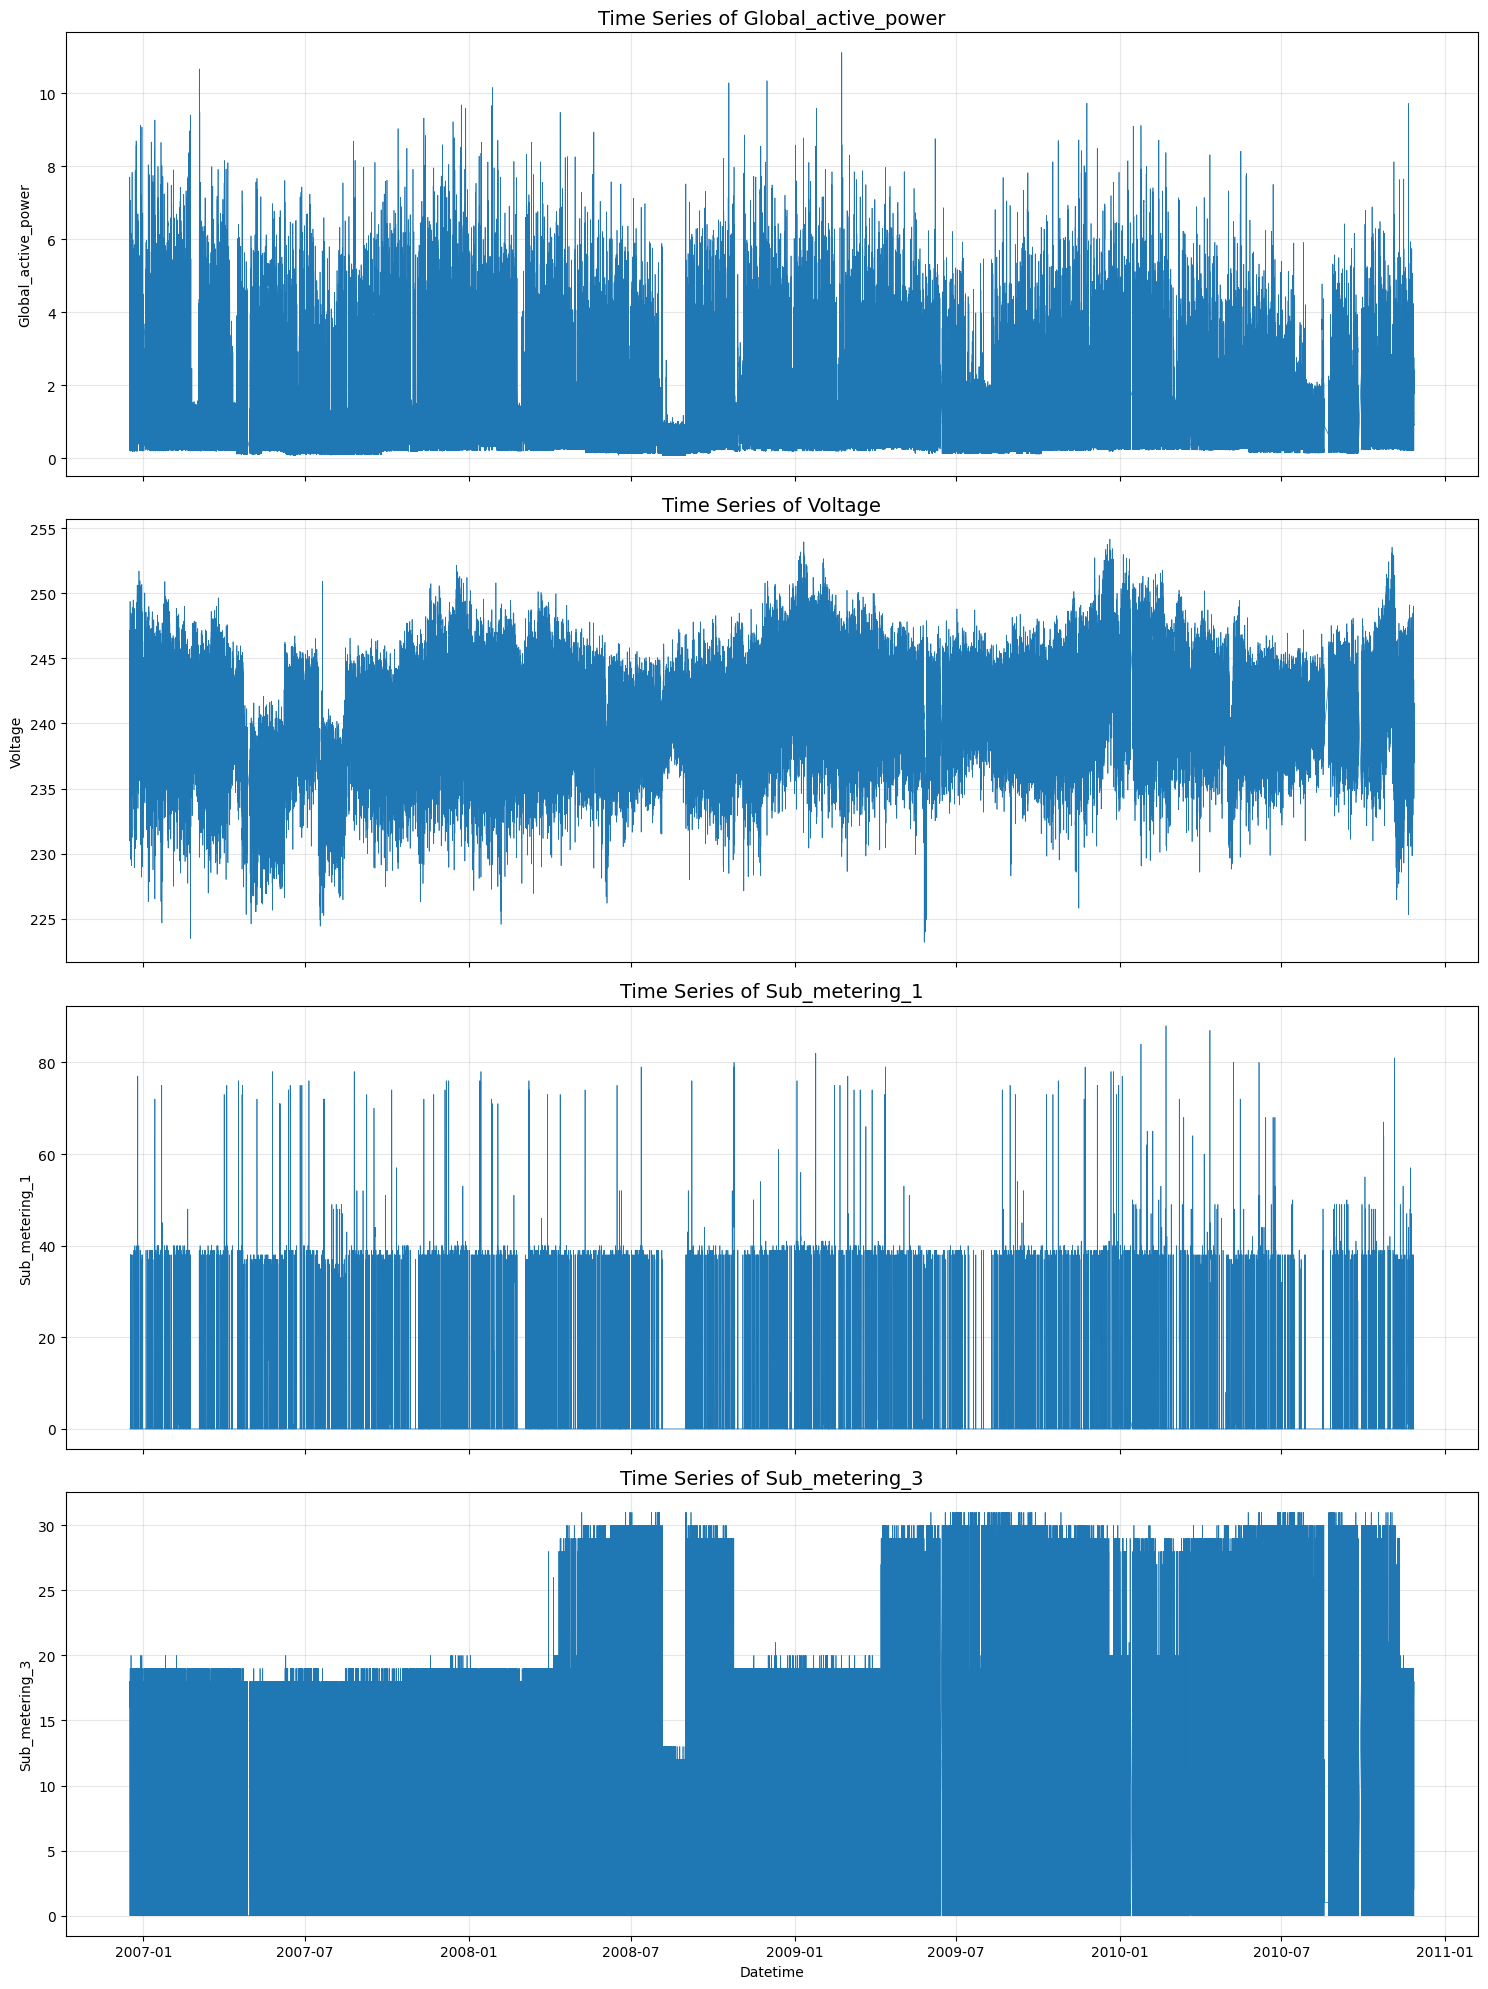

In [28]:
# build your line chart here
variables_to_plot = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_3']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(df['Datetime'], df[var], linewidth=0.5)
    axes[i].set_title(f'Time Series of {var}', fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.xlabel('Datetime')
plt.tight_layout()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:the high density of minute-by-minute data over four years makes the charts very noisy and difficult to interpret for seasonal or daily trends. Aggregation, like the monthly averages we'll do next, usually provides a much clearer picture.


In [33]:
# compute your monthly average here
# We specify numeric_only=True to ensure pandas only averages numerical columns and ignores objects like Date/Time
df_monthly = df.groupby(pd.Grouper(key='Datetime', freq='ME')).mean(numeric_only=True).reset_index()

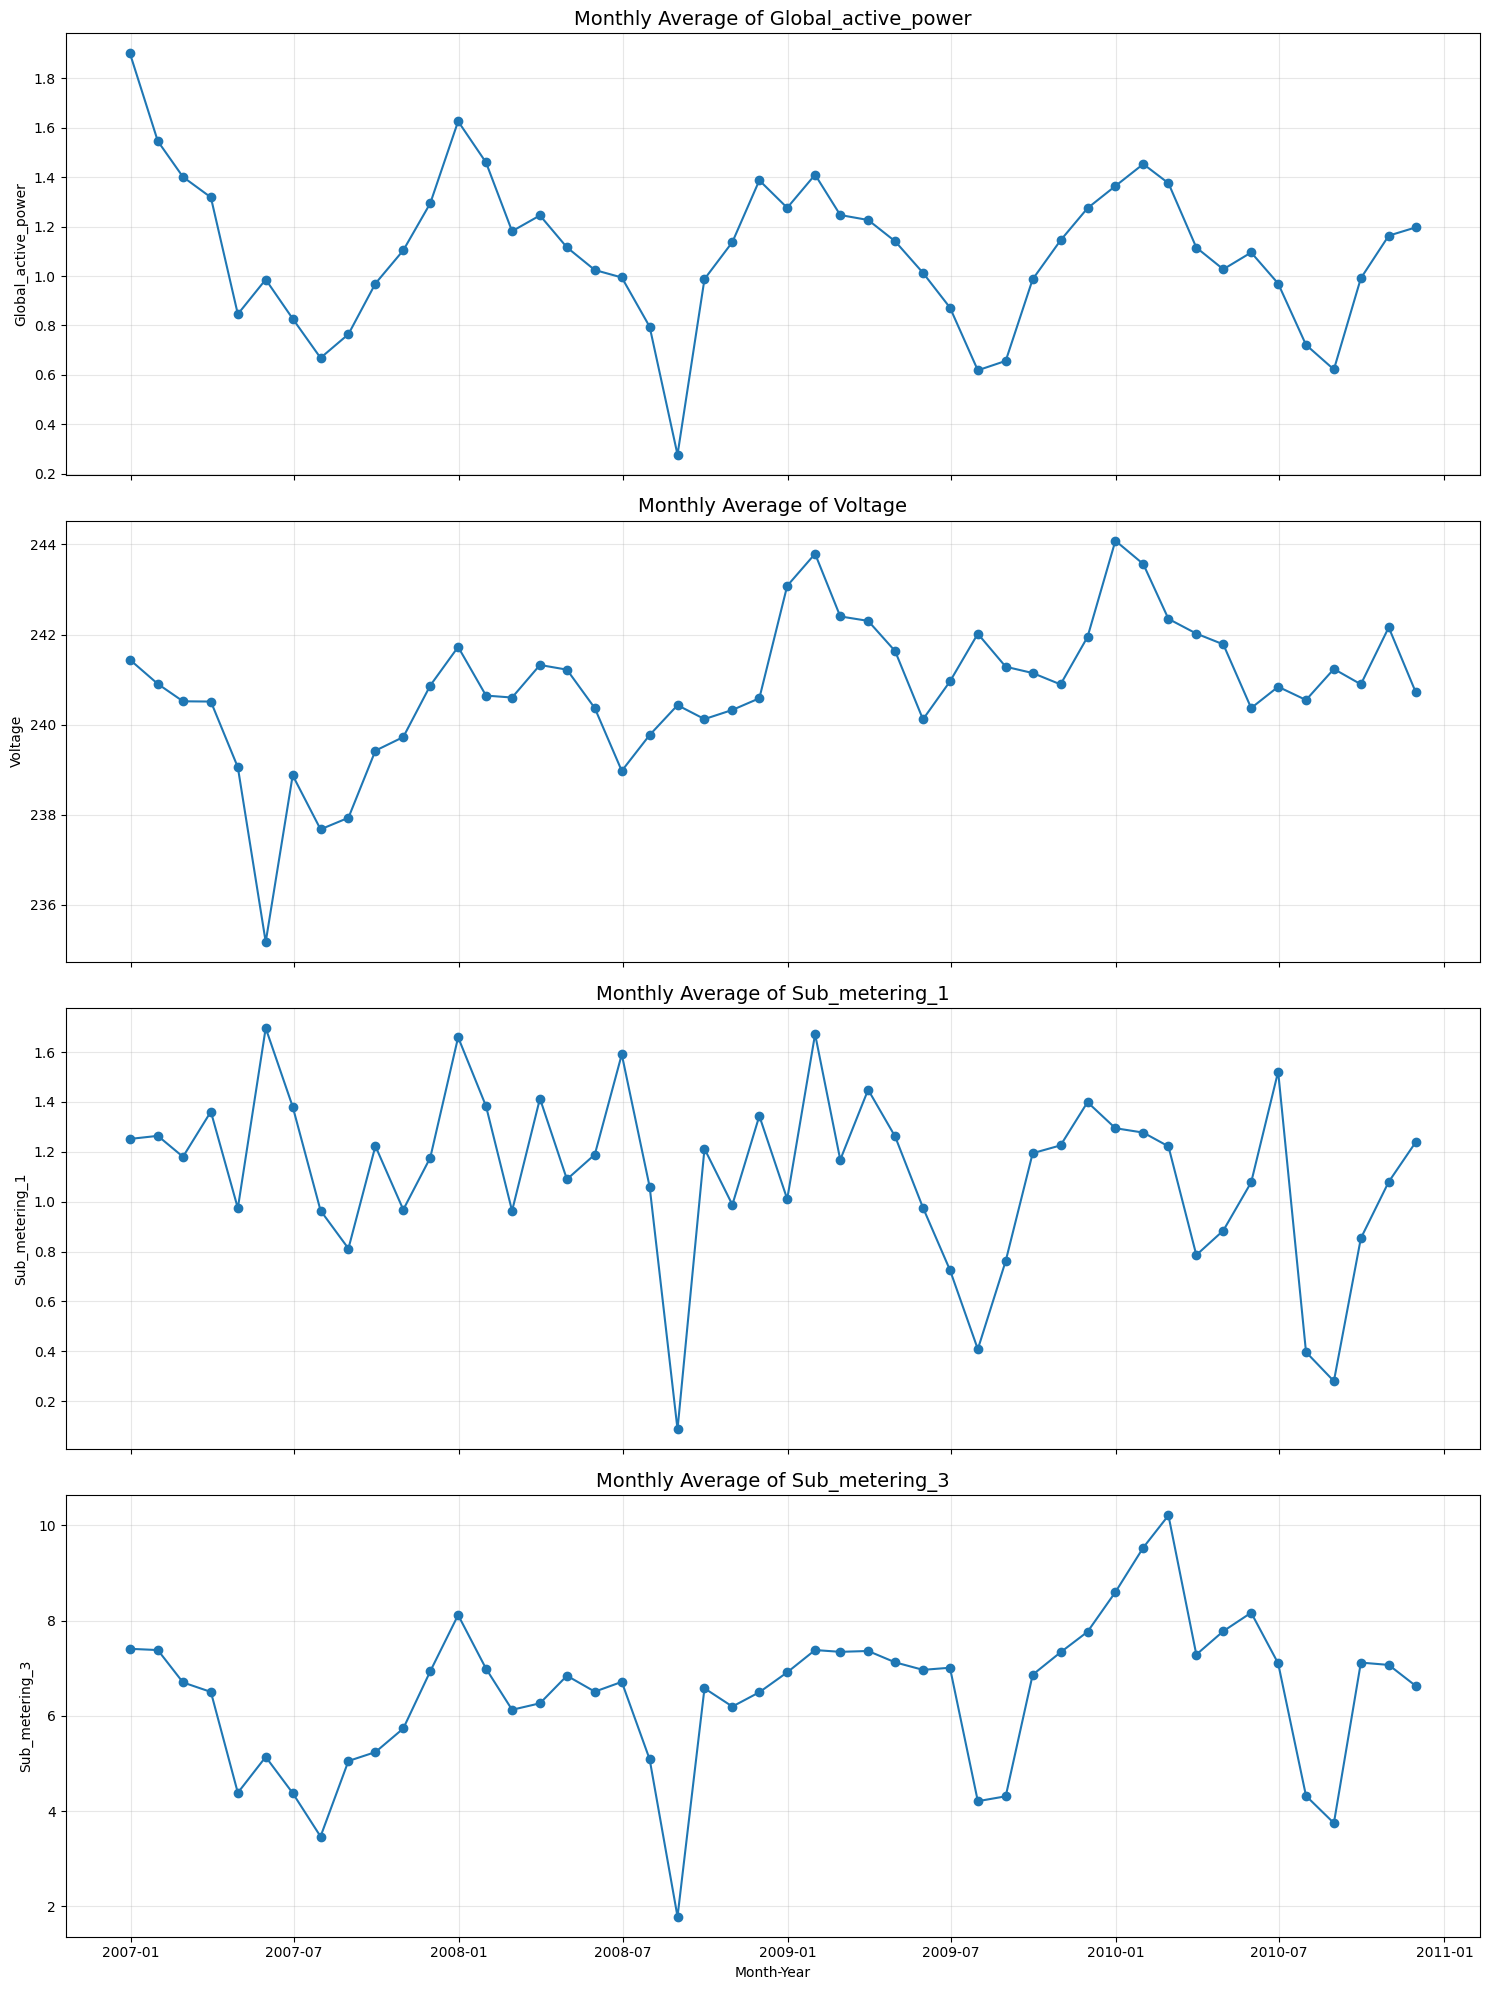

In [34]:
# build your linechart here
variables_to_plot = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_3']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(df_monthly['Datetime'], df_monthly[var], marker='o', linestyle='-')
    axes[i].set_title(f'Monthly Average of {var}', fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.xlabel('Month-Year')
plt.tight_layout()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: A clear seasonal pattern emerges. Global active power and Sub_metering_3 (HVAC/Heating) move in lockstep, both peaking in the winter months. This suggests that heating is likely the biggest contributor to overall energy use. The kitchen appliances (Sub_metering_1) show more sporadic usage but also tend to be slightly higher in the winter months.


In [37]:
# compute your moving average here
# 30 days * 24 hours/day * 60 minutes/hour = 43200 minutes
window_size = 30 * 24 * 60
df_rolling = df.set_index('Datetime')[variables_to_plot].rolling(window=window_size).mean().reset_index()

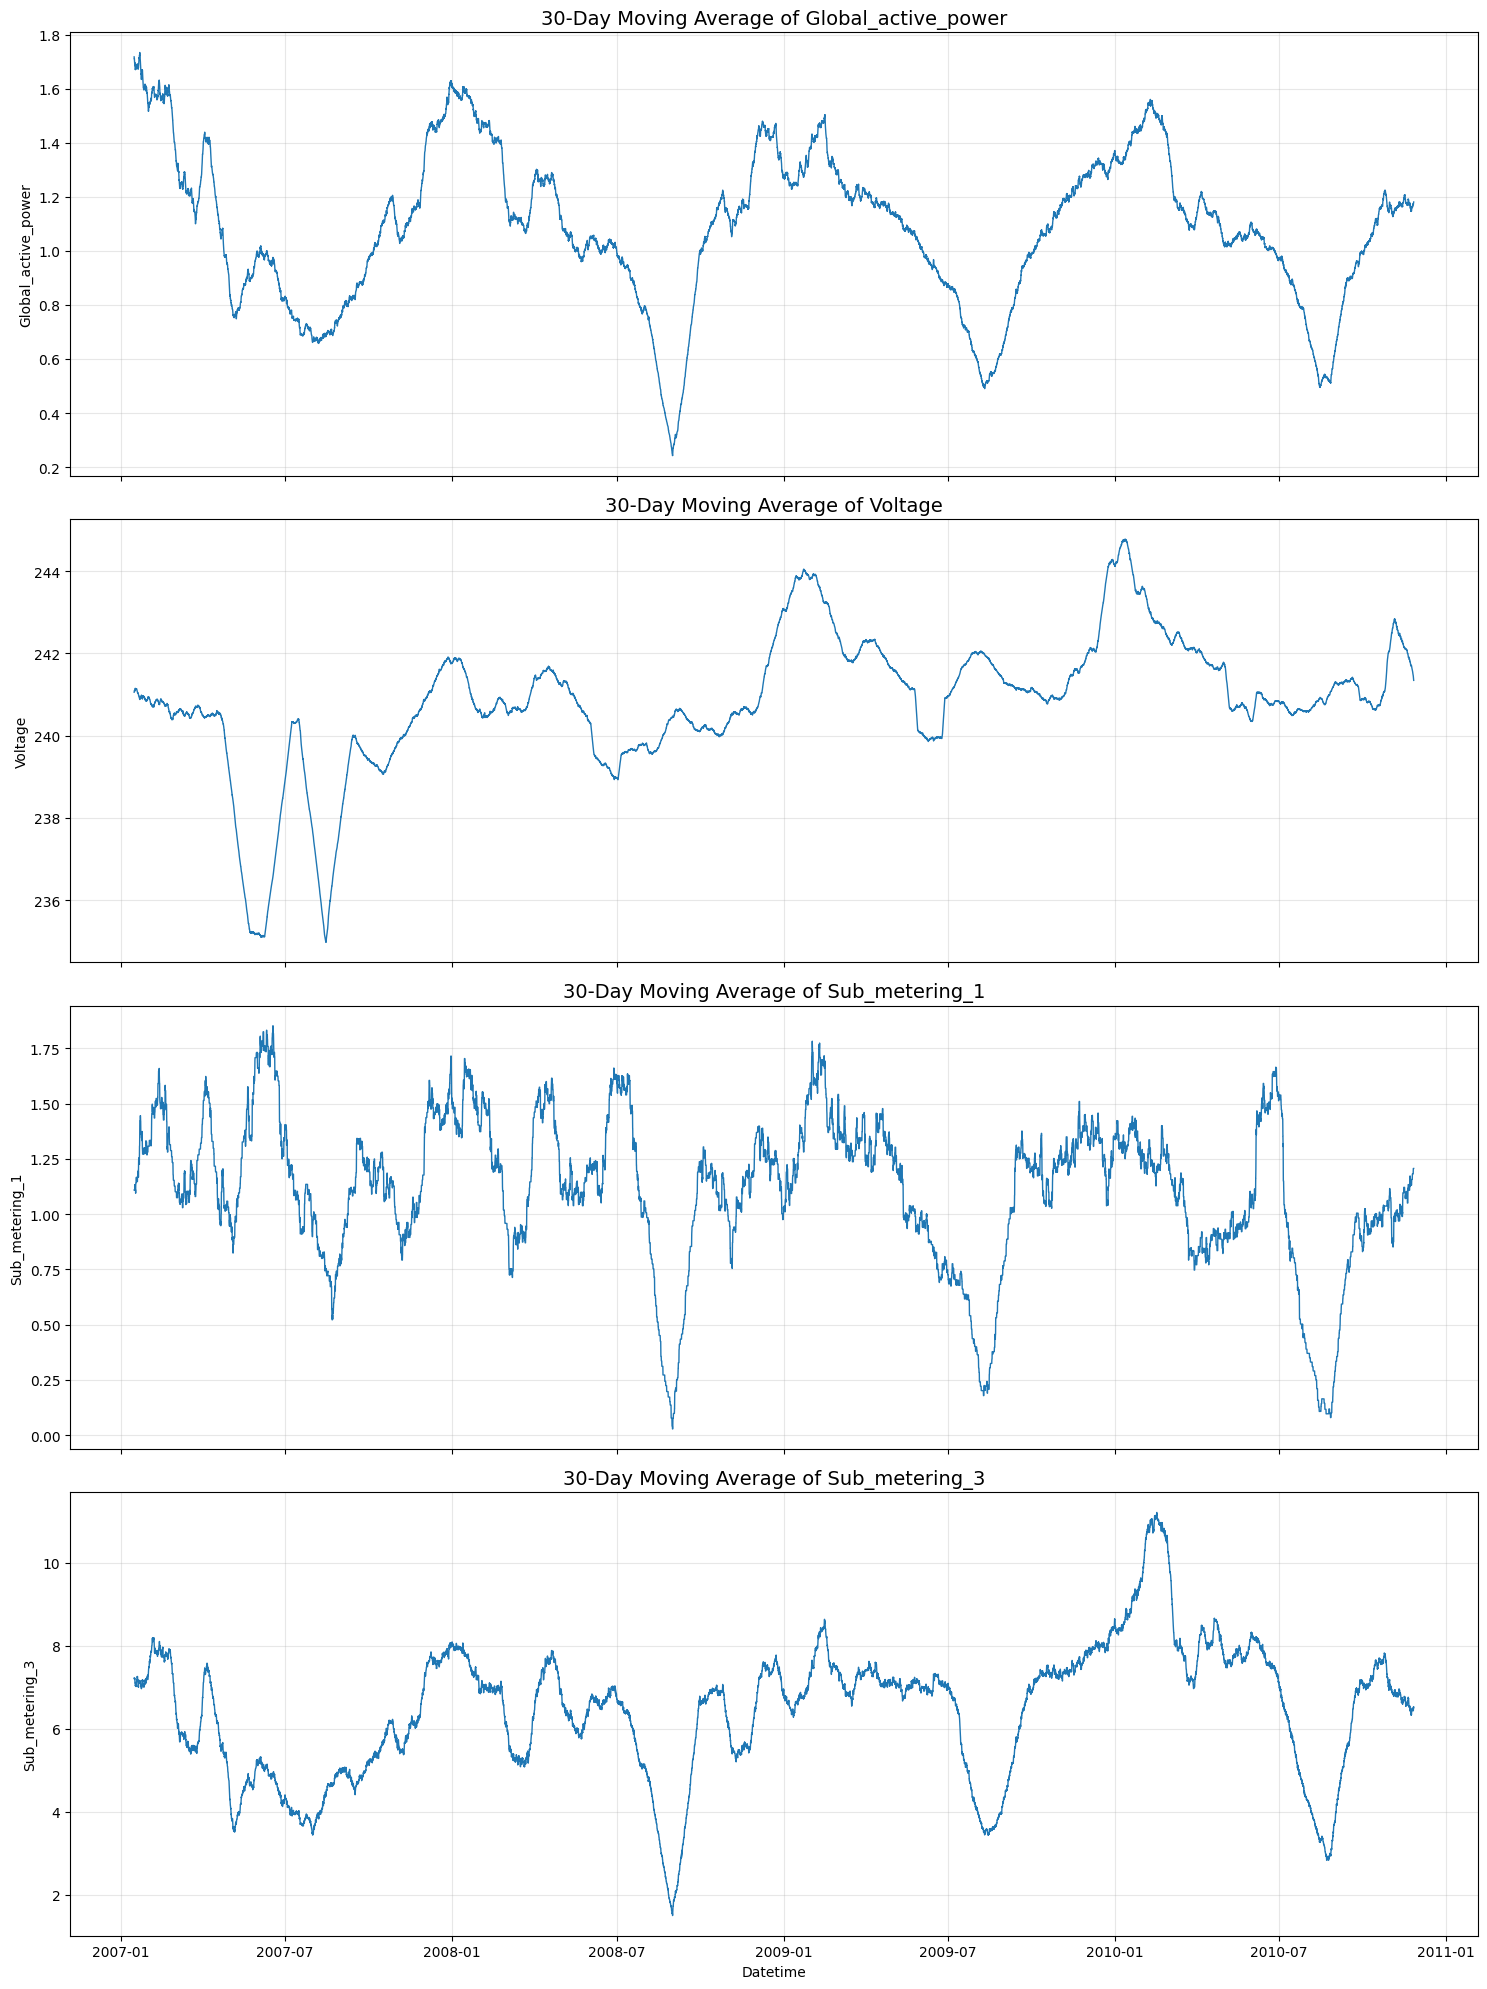

In [38]:
# build your line chart on the moving average here
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(df_rolling['Datetime'], df_rolling[var], linewidth=1)
    axes[i].set_title(f'30-Day Moving Average of {var}', fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.xlabel('Datetime')
plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The 30-day moving average provides a much smoother and more continuous view of the trends compared to the monthly average. While the monthly average is great for high-level summaries, the moving average is often more effective for identifying the exact timing of shifts in behavior, as it doesn't force the data into rigid calendar buckets.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

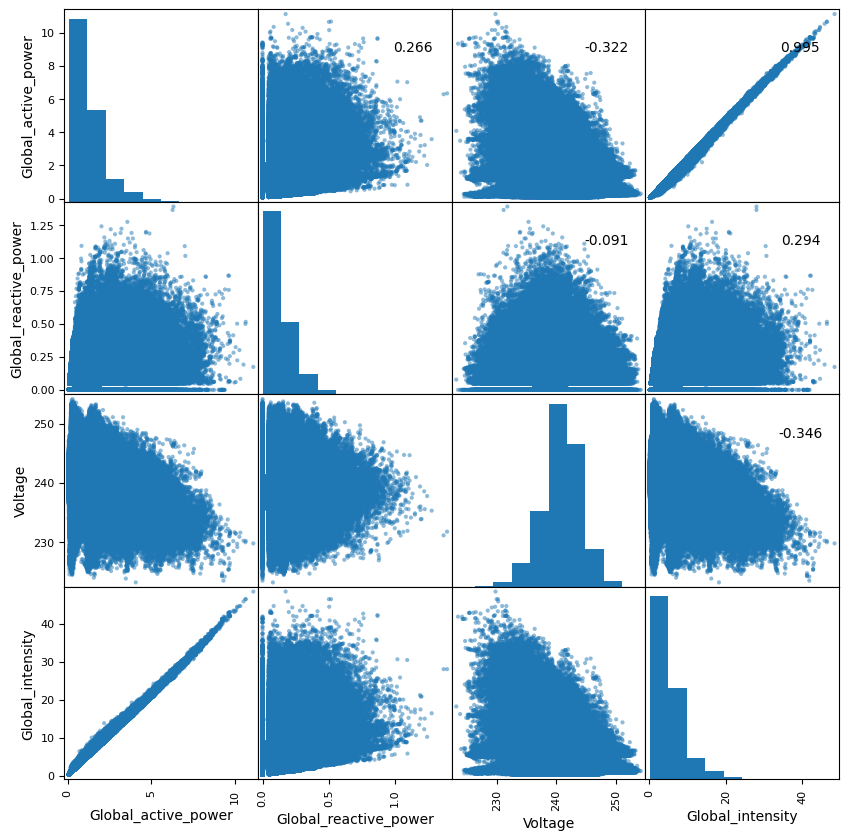

In [39]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: Based on the correlation matrix, the most important finding is the near-perfect correlation of 0.995 between Global active power and Global intensity. This makes sense as they are physically related, but for machine learning, it means they are redundant. Including both in a model could lead to multicollinearity issues, so it's usually best to pick one. I've updated the notebook with these observations.
